In [ ]:
# This script mainly focuses on producing the plots showing the results of the sentiment analysis for the manifestos from 1963 to 2019

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load dataset sentiment dataset for manifestos from 1963 to 2019
df = pd.read_csv("./data/manifesto_texts_sentiment_1963_2019.csv")
drop_col = ["Unnamed: 0.1","Unnamed: 0"]
df = df.drop(drop_col, axis=1)
df

,party,date,text,cmp_code,party_name,main_topic,sentiment
0,43320,1963-10-01,ARBEITSPROGRAMM 1963 Vor 75 Jahren erfolgte d...,305,SPS,political system,neutral
1,43320,1963-10-01,In Würdigung dieses historischen und für die w...,202,SPS,freedom and democracy,positive
2,43320,1963-10-01,Recht auf Bildung — Chancen für die Jugend De...,506,SPS,welfare and quality of life,positive
3,43320,1963-10-01,Jedermann soll Anteil an den kulturellen Werte...,502,SPS,welfare and quality of life,neutral
4,43320,1963-10-01,Was dem ganzen Volke und vornehmlich der Jugen...,506,SPS,welfare and quality of life,positive
...,...,...,...,...,...,...,...
32896,43811,2019-10-01,The same is true for other projects that lead ...,414,BDP,economy,neutral
32897,43811,2019-10-01,"Various reforms in the financial center, for e...",414,BDP,economy,positive
32898,43811,2019-10-01,They must be seen as an opportunity.,414,BDP,economy,positive
32899,43811,2019-10-01,There is no way around the recognition and imp...,107,BDP,external relations,neutral


In [6]:
# Convert 'date' column to datetime format and extract the year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df

,party,date,text,cmp_code,party_name,main_topic,sentiment,year
0,43320,1963-10-01,ARBEITSPROGRAMM 1963 Vor 75 Jahren erfolgte d...,305,SPS,political system,neutral,1963
1,43320,1963-10-01,In Würdigung dieses historischen und für die w...,202,SPS,freedom and democracy,positive,1963
2,43320,1963-10-01,Recht auf Bildung — Chancen für die Jugend De...,506,SPS,welfare and quality of life,positive,1963
3,43320,1963-10-01,Jedermann soll Anteil an den kulturellen Werte...,502,SPS,welfare and quality of life,neutral,1963
4,43320,1963-10-01,Was dem ganzen Volke und vornehmlich der Jugen...,506,SPS,welfare and quality of life,positive,1963
...,...,...,...,...,...,...,...,...
32896,43811,2019-10-01,The same is true for other projects that lead ...,414,BDP,economy,neutral,2019
32897,43811,2019-10-01,"Various reforms in the financial center, for e...",414,BDP,economy,positive,2019
32898,43811,2019-10-01,They must be seen as an opportunity.,414,BDP,economy,positive,2019
32899,43811,2019-10-01,There is no way around the recognition and imp...,107,BDP,external relations,neutral,2019


In [40]:
# Calculate the percentage of each sentiment per year
sentiment_counts = df.groupby(['year', 'sentiment']).size().unstack(fill_value=0)
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

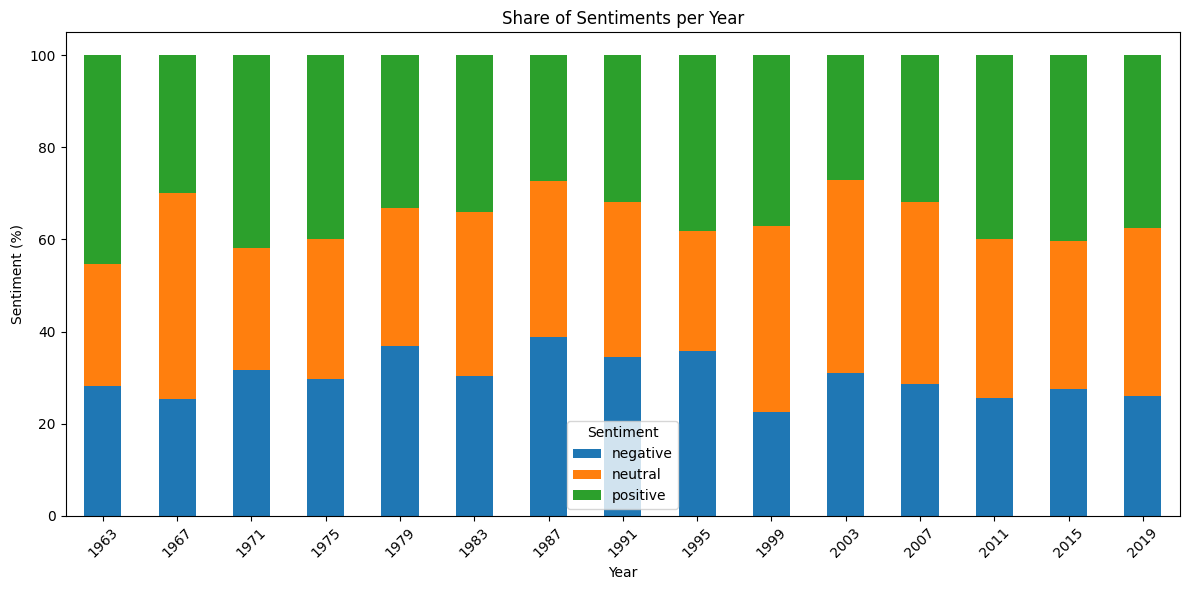

In [41]:
# Plot share of each sentiment over the years
fig, ax = plt.subplots(figsize=(12, 6))
sentiment_percentages.plot(kind='bar', stacked=True, ax=ax)

ax.set_title('Share of Sentiments per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Sentiment (%)')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')

plt.tight_layout()
plt.show()

In [7]:
# Function for share of each sentiment per topic
def plot_sentiment_by_topic(df, topic):
    
    df_topic = df[df['main_topic'] == topic]

 
    df_topic['date'] = pd.to_datetime(df_topic['date'])
    df_topic['year'] = df_topic['date'].dt.year

    
    filtered_df = df_topic[df_topic['sentiment'].isin(['negative', 'positive'])]
    sentiment_counts = filtered_df.groupby(['year', 'sentiment']).size().unstack(fill_value=0)
    sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

    
    fig, ax = plt.subplots(figsize=(12, 6))
    for sentiment in ['positive', 'negative']:
        if sentiment in sentiment_percentages:
            sentiment_percentages[sentiment].plot(kind='line', marker='o', ax=ax, label=sentiment)

    ax.set_title(f'Share of Positive and Negative Sentiments per Year for Topic: {topic}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Sentiment (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')

    
    plt.tight_layout()
    plt.show()

In [ ]:
plot_sentiment_by_topic(df, 'economy')

In [21]:
def plot_negative_sentiment_trends(df):
    # Extract the year from the date column
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year

    # Drop entries with NaN party names
    df = df.dropna(subset=['party_name'])

    # Create a binary column for negative sentiment
    df['is_negative'] = (df['sentiment'] == 'negative').astype(int)

    # Group by party and year, calculate share of negative sentiment
    grouped = df.groupby(['party_name', 'year'])['is_negative'].mean().reset_index()

    # Convert to percentage
    grouped['is_negative'] = grouped['is_negative'] * 100

    # List of parties to ensure consistent colors
    parties = ['SPS', 'FDP', 'CVP', 'SVP', 'GPS', 'GLP', 'BDP']

    # Color palette for parties
    color_map = {
        'SPS': '#1f77b4',  # Blue
        'FDP': '#ff7f0e',  # Orange
        'CVP': '#2ca02c',  # Green
        'SVP': '#d62728',  # Red
        'GPS': '#9467bd',  # Purple
        'GLP': '#8c564b',  # Brown
        'BDP': '#e377c2'   # Pink
    }

    # Initialize the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    for party in parties:
        party_data = grouped[grouped['party_name'] == party]
        if not party_data.empty:
            ax.plot(party_data['year'], party_data['is_negative'], label=party, marker='o', color=color_map[party])

    # Customize the plot
    ax.set_title('Share of Negative Sentiment per Year for All Parties: 1963-2019')
    ax.set_xlabel('Year')
    ax.set_ylabel('Negative Sentiment (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.1f}%"))

    # Set y-axis limits based on data
    y_max = grouped['is_negative'].max()
    ax.set_ylim(0, min(y_max * 1.1, 100))  # 10% padding, but not exceeding 100%

    # Ensure x-axis shows only integer years
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Tight layout and show the plot
    plt.tight_layout()
    plt.show()

C:\Users\Laura Mauricio\AppData\Local\Temp\ipykernel_17480\650303432.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_negative'] = (df['sentiment'] == 'negative').astype(int)


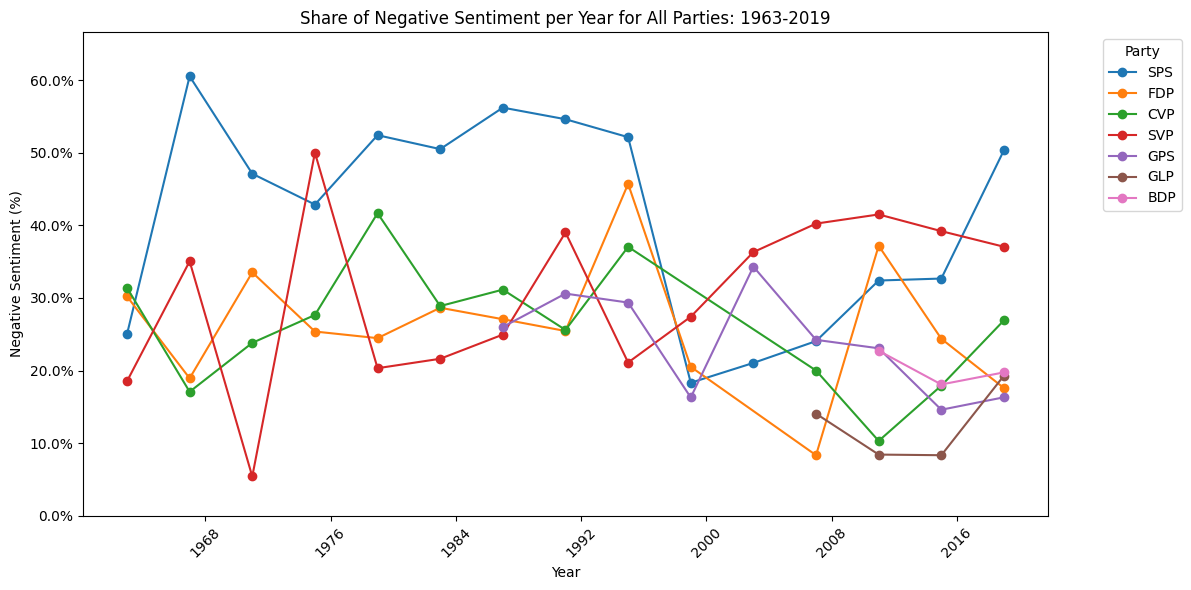

In [22]:
plot_negative_sentiment_trends(df)

In [17]:
def plot_negative_sentiment_by_topic_per_party(df, topic):
    # Drop entries with NaN party names
    df = df.dropna(subset=['party_name'])

    # Filter for the specified topic
    df_topic = df[df['main_topic'] == topic]

    # Extract the year from the date column
    df_topic['date'] = pd.to_datetime(df_topic['date'])
    df_topic['year'] = df_topic['date'].dt.year

    # Filter for negative sentiments
    df_negative = df_topic[df_topic['sentiment'] == 'negative']
    
    # List of parties to ensure consistent colors
    parties = ['SPS', 'FDP', 'CVP', 'SVP', 'GPS', 'GLP', 'BDP']

    # Color palette for parties
    color_map = {
        'SPS': '#1f77b4',  # Blue
        'FDP': '#ff7f0e',  # Orange
        'CVP': '#2ca02c',  # Green
        'SVP': '#d62728',  # Red
        'GPS': '#9467bd',  # Purple
        'GLP': '#8c564b',  # Brown
        'BDP': '#e377c2'   # Pink
    }

    # Initialize the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    for party in parties:
        # Filter the dataframe for the current party
        df_party = df_negative[df_negative['party_name'] == party]
        
        if not df_party.empty:
            # Calculate sentiment percentages per year
            total_counts = df_topic[df_topic['party_name'] == party].groupby('year').size()
            negative_counts = df_party.groupby('year').size()
            negative_percentages = (negative_counts / total_counts * 100).fillna(0)

            # Plot negative sentiments for the current party
            negative_percentages.plot(kind='line', marker='o', ax=ax, label=party, color=color_map[party])

    # Customize the plot
    ax.set_title(f'Share of Negative Sentiment per Year for Topic: {topic}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Negative Sentiment (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Tight layout and show the plot
    plt.tight_layout()
    plt.show()

C:\Users\Laura Mauricio\AppData\Local\Temp\ipykernel_17480\229102822.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic['date'] = pd.to_datetime(df_topic['date'])
C:\Users\Laura Mauricio\AppData\Local\Temp\ipykernel_17480\229102822.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic['year'] = df_topic['date'].dt.year


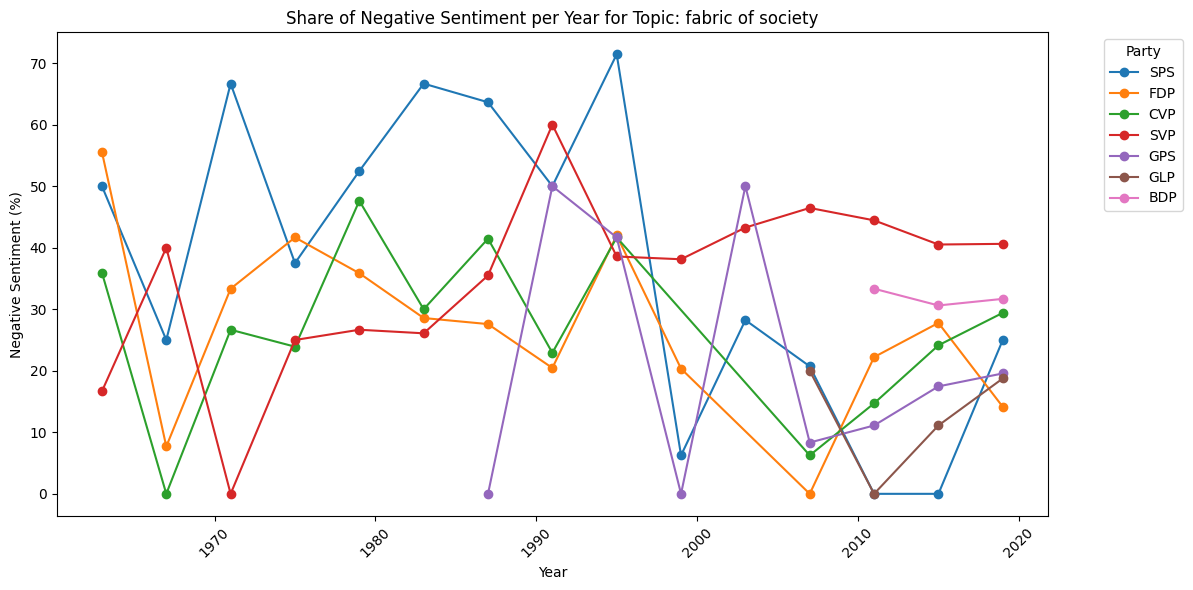

In [18]:
plot_negative_sentiment_by_topic_per_party(df, "fabric of society")

C:\Users\Laura Mauricio\AppData\Local\Temp\ipykernel_17480\229102822.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic['date'] = pd.to_datetime(df_topic['date'])
C:\Users\Laura Mauricio\AppData\Local\Temp\ipykernel_17480\229102822.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic['year'] = df_topic['date'].dt.year


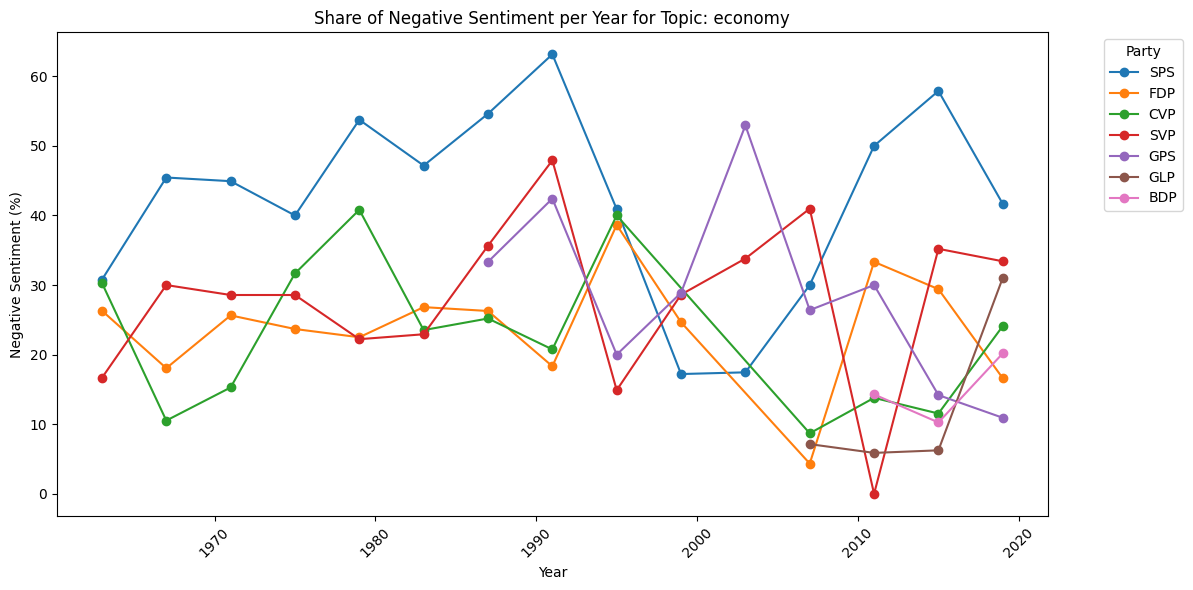

In [19]:
plot_negative_sentiment_by_topic_per_party(df, "economy")

C:\Users\Laura Mauricio\AppData\Local\Temp\ipykernel_17480\229102822.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic['date'] = pd.to_datetime(df_topic['date'])
C:\Users\Laura Mauricio\AppData\Local\Temp\ipykernel_17480\229102822.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic['year'] = df_topic['date'].dt.year


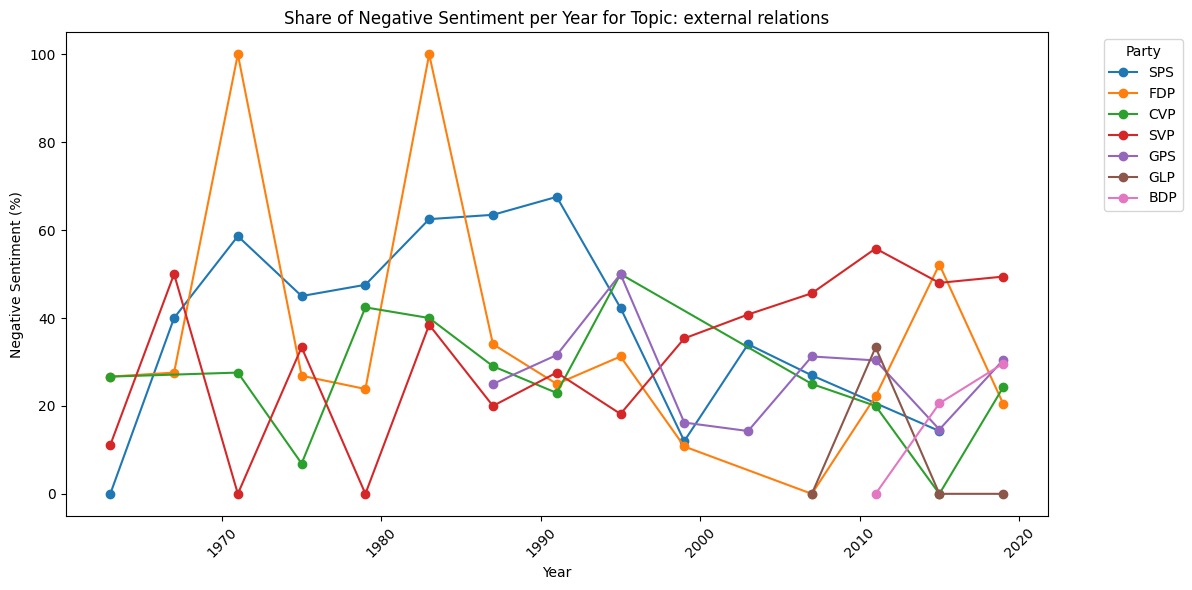

In [20]:
plot_negative_sentiment_by_topic_per_party(df, "external relations")